<a href="https://colab.research.google.com/github/uditsevak/Langchain/blob/main/Udit_of_GDG_Task_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GDG Task 9**

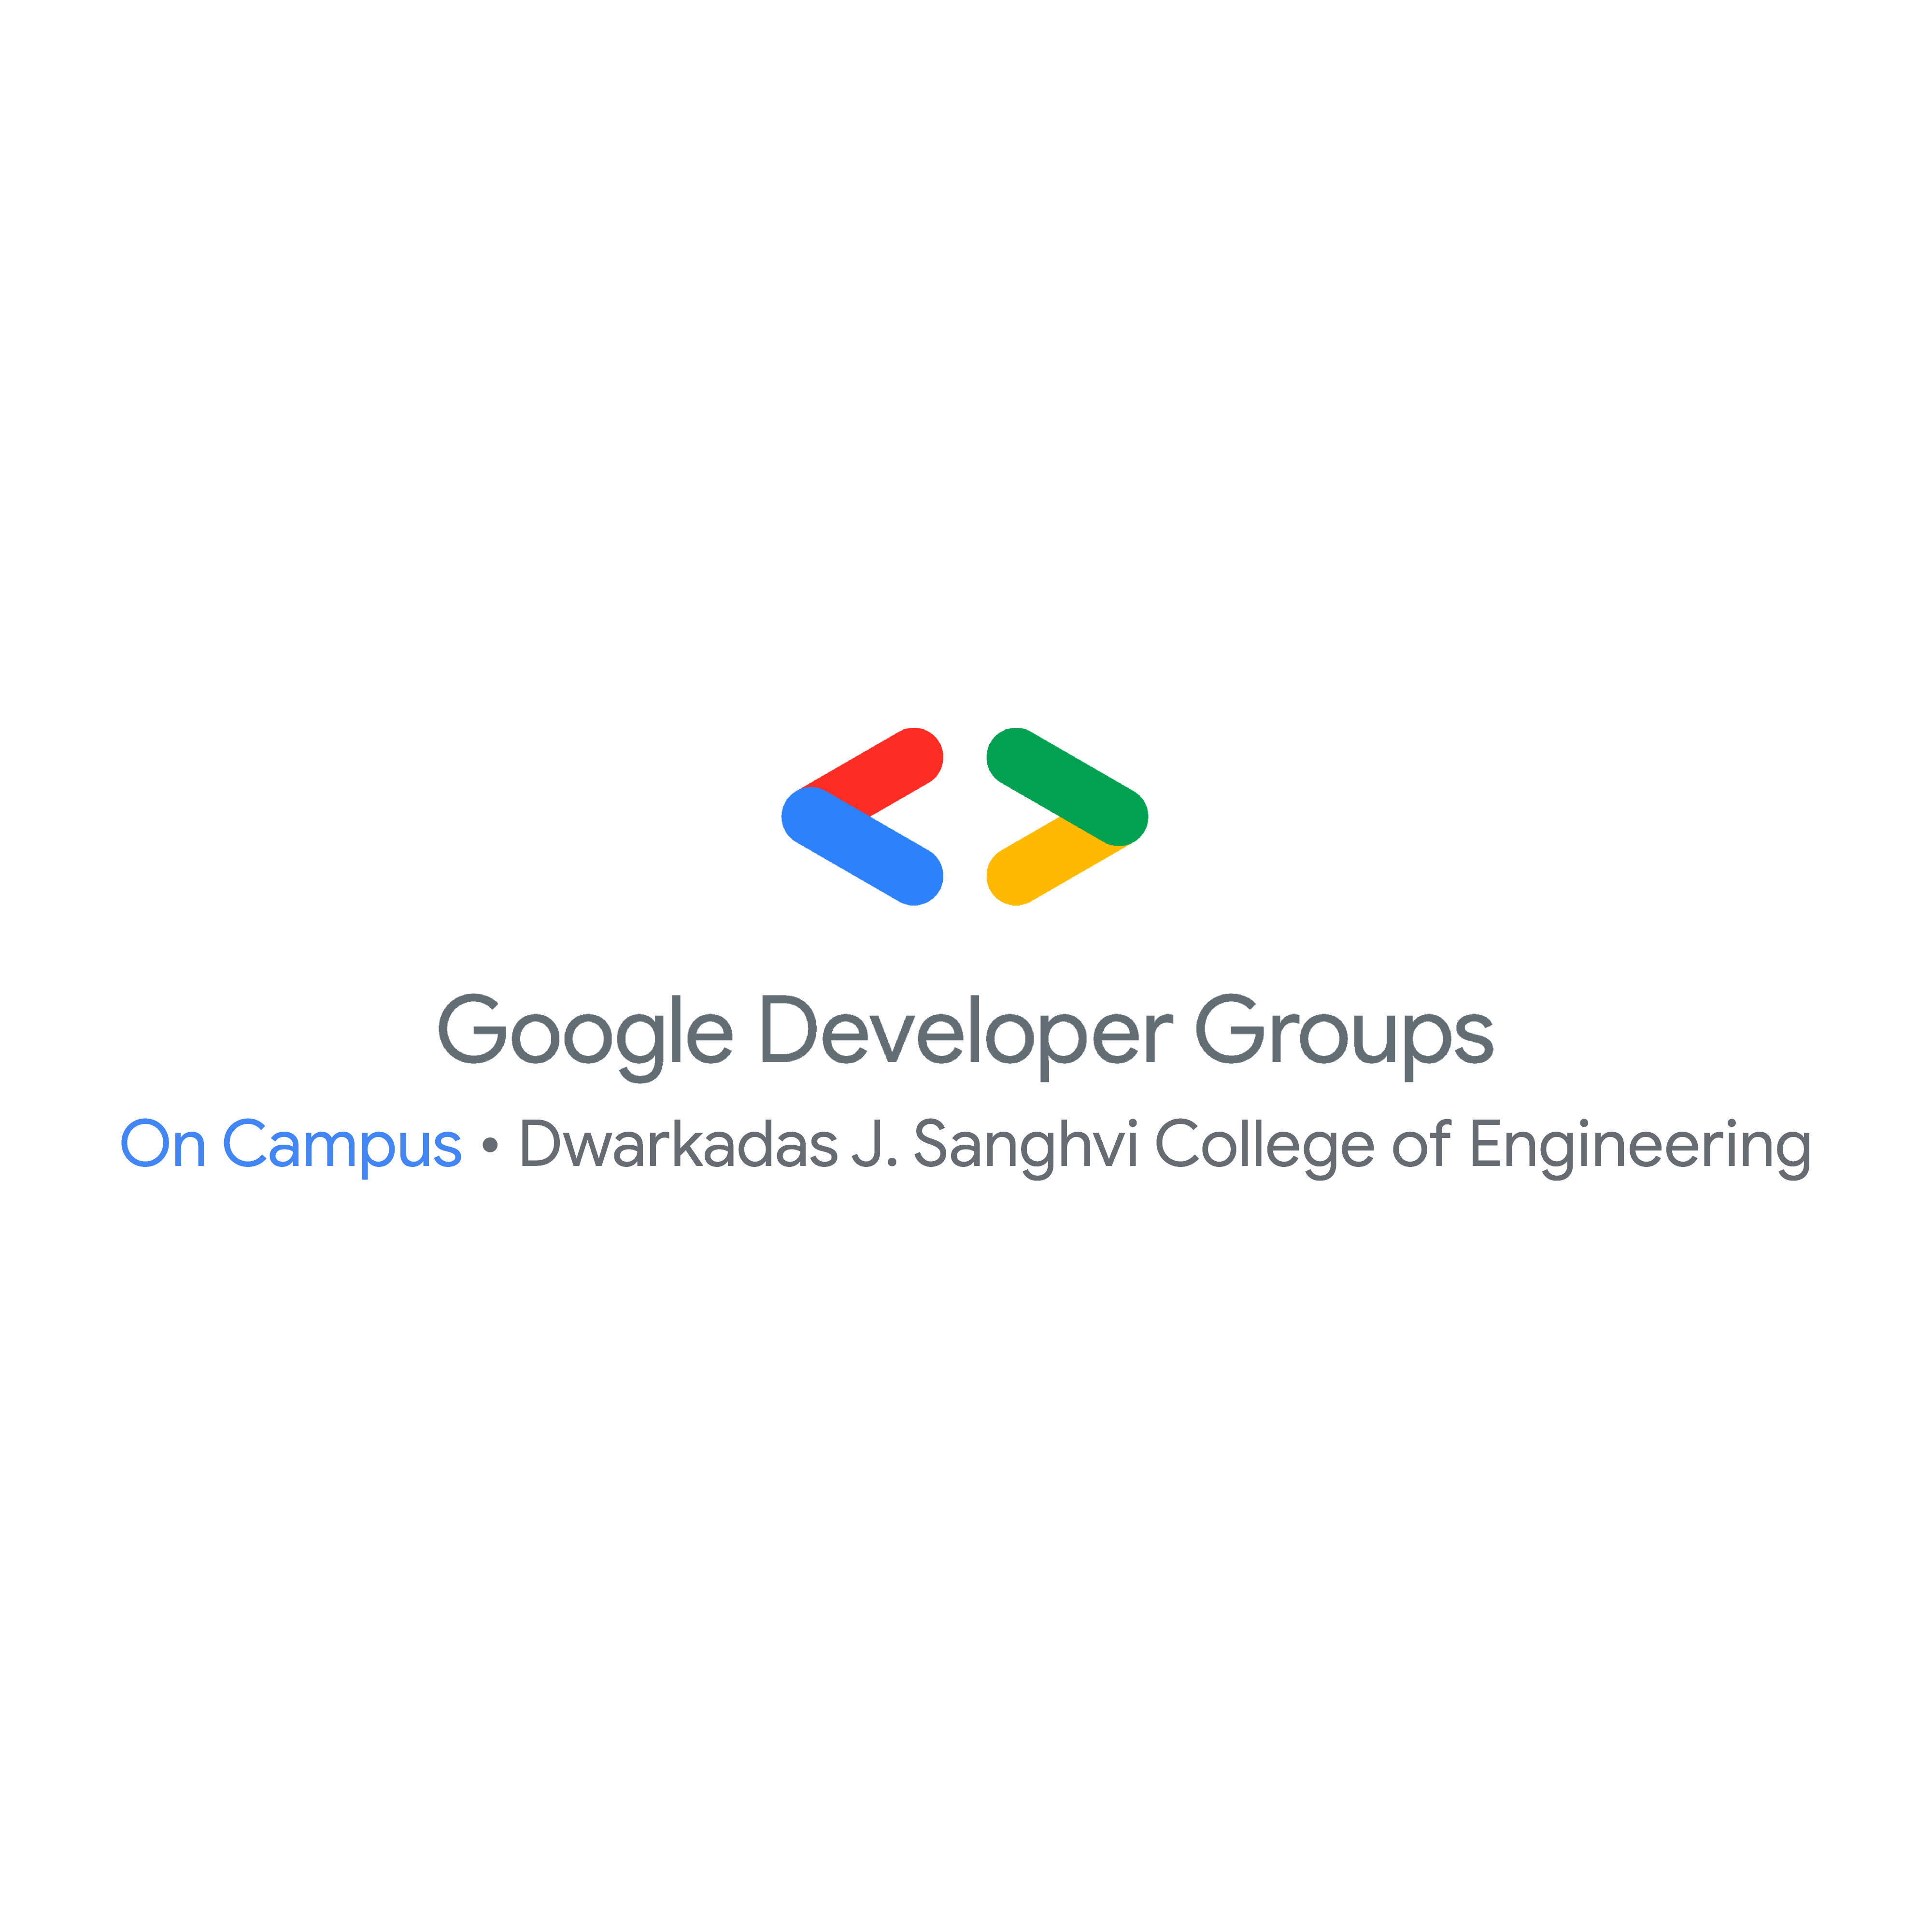


Welcome to the last task of the Learning Period!

With the knowledge you have accumulated in the past few months, its time to make a project. We will be zeroing in on scraping with Selenium and deployment with FastAPI and StreamLit, using pretrained HuggingFace models for the ML parts along the way.


##importing & installing stuff

In [1]:
!pip install fastapi[all] nest-asyncio pyngrok uvicorn streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.6/452.6 kB 12.2 MB/s eta 0:00:00


Below is the boilerplate code for running Selenium, a popular web scraping library in Python. It requires something called a "ChromeDriver", which is an agent that opens a Chrome tab to perform the instructions you ask it to do so. But hold on, what even is web scraping? Read below in case you don't know:

https://www.zyte.com/learn/what-is-web-scraping/

In [2]:
# set up boilerplate for running selenium in google colab.
# you don't need to run this code if you do it in jupyter notebook, or other local python setting.
# for running selenium locally, you just need to download ChromeDriver once and use its path again and again.
# colab is not a local machine, which kinda complicates things.

%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,315 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,655 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [3]:
!pip install chromedriver-autoinstaller -q

import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

import time
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensures GUI is off.
# if you do this on local without headless mode, it actually opens a chrome tab and runs it on its own.
# i would recommend y'all to try it once there, its pretty sick. sadly, on colab, only headless mode is allowed.
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.11/dist-packages/chromedriver_autoinstaller/133/chromedriver'

In [4]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
import urllib.request
import warnings
warnings.filterwarnings('ignore')

The project aims to see what emotions YouTube thumbnails project for certain search queries. This can be useful in determining user sentiment related to certain topics, which is useful for social media analysis.

The project consists of scraping many youtube thumbnails, for a particular search query. We then perform image captioning on these thumbnails, which is essentially giving descriptions of the images.

These descriptions are not always grammatically accurate, so we then correct that aspect of it. These corrected descriptions are then passed to a sentiment analyzer.

##scraping

Right, onto scraping then. Initialise a webdriver for Chrome, with options as chrome_options above.



In [5]:
driver =   webdriver.Chrome(options=chrome_options) # initialise webdriver

Also, the typical structure of a YouTube page URL when you search something there is:

https://www.youtube.com/results?search_query=city+of+stars

This when you search "city of stars" on YouTube's search bar.

Use the get() function to let the driver know what URL it has to scrape on Chrome.

In [6]:
# get the URL
driver.get("https://www.youtube.com/results?search_query=city+of+stars")

Now, use the WebDriverWait() function for ensuring the scraping process happens for atleast 10 seconds.

In [7]:
# make it wait
element = WebDriverWait(driver,10)

The scraper works by parsing the actual HTML code of the YouTube page we queried. So, first, we will see what a YouTube video showing up on a page like below has as HTML code for its video suggestions.

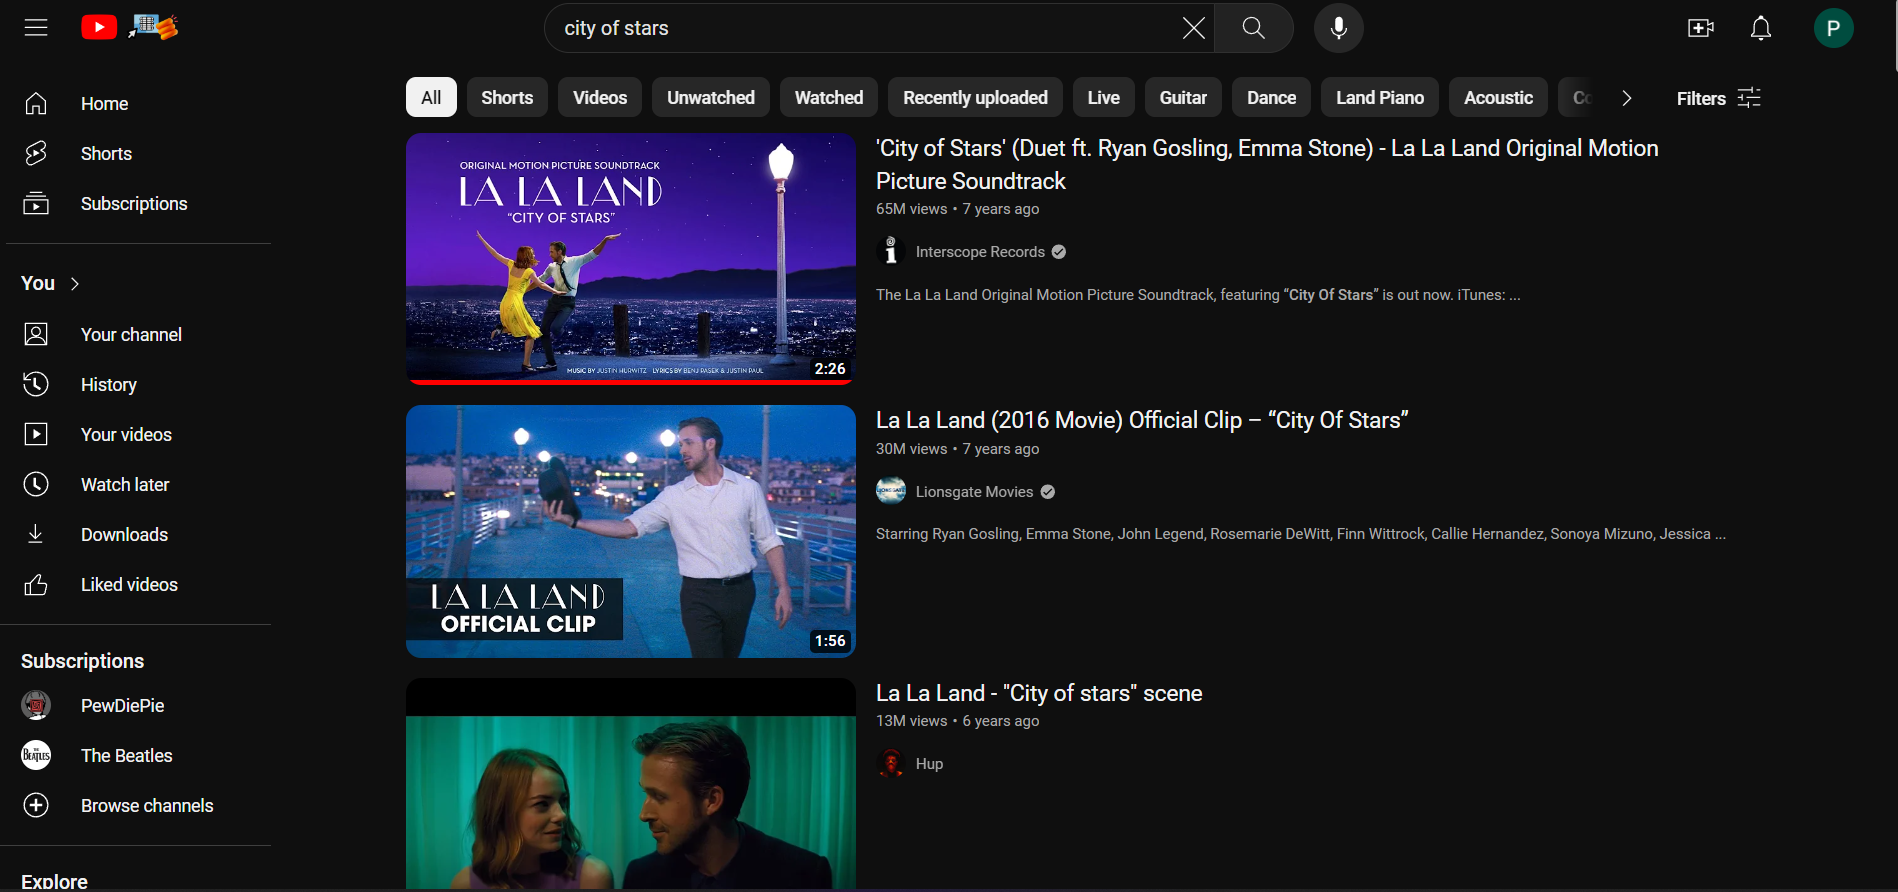



Right click on any video title, and inspect element. Eventually, you will find something like this:
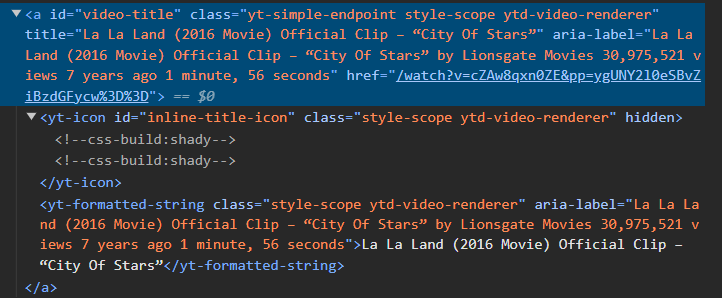

As you can see, the anchor element in the the picture above has id as "video_title" (double quotes are important here!). It also eventually has what we really want: the video URL in the href. So, use the find_elements() function to search for the data via this id only. Do so by XPATH traversal. Resources:

https://www.educative.io/answers/what-are-findelement-and-findelements-in-selenium-python

https://www.browserstack.com/guide/findelement-in-selenium

https://www.w3schools.com/xml/xml_xpath.asp

In [8]:
user_data = driver.find_elements(By.XPATH,'//a[@id="video-title"]')

Now, for a typical YouTube URL, the video ID is contained in the part after "v=". Eg: https://www.youtube.com/watch?v=GTWqwSNQCcg. This has video ID "GTWqwSNQCcg". Which is our ultimate requirement.

Note that the link is there in "href" section. Use the get_attribute() function to retrieve the link and also take care that it considers only thumbnails from YouTube videos, not Shorts. This is what a YT Short anchor tag looks like:

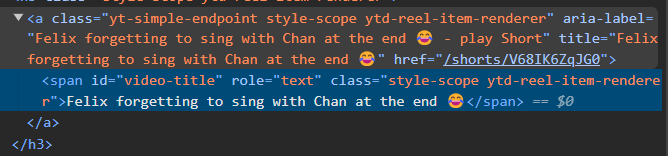

That should be a little hint for you.

Also, append to links only the video ids from the URLs. Not the entire URL. Why we do this becomes clearer ahead.

In [12]:
import re
links = []
for i in user_data:
    attr = i.get_attribute('href')       # extract necessary attribute
    if not "shorts" in attr :
      video_id = re.search(r"(?<=v=)[^&#]+",attr)# enter condition to ignore YT Shorts:
      if video_id:
        links.append(video_id.group(0)) # only the video IDs should be appended, remember

If done correctly, your links should be similar to the list shown below.

In [13]:
links

['GTWqwSNQCcg',
 'cZAw8qxn0ZE',
 'xkqfm3muuhM',
 'R2CzFQpWoLs',
 'VFUos9sYbHs',
 'dvoCx3cqAzU']

Now, a YouTube video thumbnail is stored as a URL in the following format:

https://i.ytimg.com/vi/video_id/maxresdefault.jpg

For example, click on the below link.

https://i.ytimg.com/vi/GTWqwSNQCcg/maxresdefault.jpg

So, using this information, we will retrieve image using urlretrieve() method from the urllib.request library. We store the images by naming them separately. Resource:

https://www.educative.io/answers/how-to-locally-save-an-image-using-urllib

In [17]:
for i in range(len(links)):
  urllib.request.urlretrieve( f"https://i.ytimg.com/vi/{links[i]}/maxresdefault.jpg"# insert appropriate link format
                             , f"{i}.jpg")

Check your folder structure. You should have a couple of images stored now.

**Note: Because of this section of code, you may get weird http errors in the streamlit and ngrok part ahead. That is because of Internal Protocol requests timing out. In that case, just rerun that specific error cell or entire notebook again.**

##huggingface pipelining

Hugging Face is a machine learning and data science platform and community that helps users build, deploy and train machine learning models. It provides the infrastructure to demo, run and deploy artificial intelligence in live applications.


Using pipelining, we can use pretrained models from HuggingFace for our purposes.

In [14]:
from transformers import pipeline

We use the following models (in this order only):


*  [Blip Image Captioning (Large)](https://huggingface.co/Salesforce/blip-image-captioning-large) - For image captioning (it essentially describes an image given to it as input). It is an image to text model.
*   [Flan T5 (Large)](https://huggingface.co/pszemraj/flan-t5-large-grammar-synthesis) - For successfully completing "single-shot grammar correction" on a potentially grammatically incorrect text that could have a lot of mistakes with the important qualifier of it does not semantically change text/information that is grammatically correct.
*    [Distilbert Sentiment Analyzer (Base)](https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student) - Can perform sentiment analysis of various scripts in different languages.



First, we have to download these models. That is done below. Some of these models are large, so it may take some time.

In [15]:
pipe_Image2Text = pipeline(
    "image-to-text", model="Salesforce/blip-image-captioning-large", device = 0) # why device = 0?

pipe_GrammarCorrection = pipeline(
    "text2text-generation", model="pszemraj/flan-t5-large-grammar-synthesis", device = 0)

pipe_SentimentAnalysis = pipeline(
    "text-classification", model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", return_all_scores = True, device = 0) # what is return_all_scores?

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


config.json:   0%|          | 0.00/892 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.56k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


We first extract descriptions of the thumbnails. Again, may take some time.

In [27]:
descriptions = []
for i in range(len(links)):
  descriptions.append(pipe_Image2Text) # use appropriate pipe
descriptions

Then, we run sentiment analysis on these descriptions. Before that, we correct potential errors that may be there.

In [28]:
sentiments = []
for i in range(len(descriptions)):
  descriptions[i] = pipe_GrammarCorrection # use appropriate pipe
  sentiments.append(pipe_SentimentAnalysis) # use appropriate pipe

In [29]:
sentiments

Congrats! The sentiment analysis part of the task is now complete. Now, to avail these cool functionalities via an API call, next you will deploy it using fastAPI and ngrok.

## fastAPI and ngrok

So you have your ML code ready and you're all set, but how do you share this with the world? There are a lot of different ways to deploy your ML project, but FastAPI gets the job in a fast and no nonsense way.

FastAPI calls itself a **"modern, fast (high-performance), web framework for building APIs with Python 3.8+ based on standard Python type hints."**
So we write our ML code in Python, and we make our endpoints also using Python in a very intuitive format. FastAPI has some good documentation - https://fastapi.tiangolo.com/

Next, lets talk about ngrok. Those of you having learnt web development would know that the endpoints you make in your backend can only be accessed when you run your frontend locally and specify the endpoints path. Good for learning, but not the most effective way to build products and keep them running across the globe.

Ngrok puts your local code on the internet by providing a 'tunnelling' between your code and the user's machine. How it works is really an ingenious lil bit of Computer Networks magic - https://requestly.io/blog/what-is-ngrok-and-how-does-it-work/

This is how deployment happens at a production scale - https://serokell.io/blog/ml-model-deployment



In [30]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
# why is this cell necessary?

In the cells below, we will create a FastAPI endpoint and expose it to the world wide web using ngrok.

In [32]:
# create an account on ngrok.com and get a free authtoken

!ngrok authtoken 2t5Yf6cyIbpsw1O472MAjbweCLJ_5KMXr2iMHG81pmSyG59zu # your token

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


Generally a FastAPI endpoint consists of a Request, Response and a function decorator denoting the endpoint type and link.

Standard FastAPI format - https://fastapi.tiangolo.com/tutorial/

In [35]:
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn
from pydantic import BaseModel
from typing import List, Dict

app = FastAPI() # initialise FastAPI() instance

# we created a new Request Body based on Pydantic's BaseModel, and specified typed variables
class QueryRequest(BaseModel):
  query: str # insert appropriate data type

# create a similar class but for the response giving the sentiment
class SentimentResponse(BaseModel):
  sentiment: str # insert appropriate data type


@app.post('/analyze', response_model = SentimentResponse) # decorator specifying get, post and actual endpoint
async def Thumbnail_Sentiment(request: QueryRequest):
    query = request.query.replace(" ", "+")

    # --- YouTube Scraping and Sentiment Analysis ---

    # Initialize webdriver (replace with your preferred configuration)
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')  # Run in headless mode
    driver = webdriver.Chrome(options=options)

    # Get YouTube search results page
    search_url = f"https://www.youtube.com/results?search_query={query}"
    driver.get(search_url)

    # Extract thumbnail image URLs (may need adjustments)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    thumbnail_elements = soup.find_all('img', {'class': 'style-scope ytd-thumbnail'})
    thumbnail_urls = [element.get('src') for element in thumbnail_elements if element.get('src') and element.get('src').startswith('https')]

    driver.quit()  # Close the driver

    sentiments = []
    for thumbnail_url in thumbnail_urls:
        try:
            # Image to Text
            description = pipe_Image2Text(thumbnail_url)[0]['generated_text']

            # Grammar Correction (optional)
            corrected_description = pipe_GrammarCorrection(description)[0][
                'generated_text'
            ]

            # Sentiment Analysis
            sentiment = pipe_SentimentAnalysis(corrected_description)
            sentiments.append(sentiment)
        except Exception as e:
            print(f"Error processing thumbnail: {thumbnail_url}, Error: {e}")

    # --- Overall Sentiment Calculation ---

    overall_sentiment = calculate_overall_sentiment(sentiments)

    return SentimentResponse(sentiment=overall_sentiment)

def calculate_overall_sentiment(sentiments: List[List[Dict[str, float]]]) -> str:
    """Calculates the overall sentiment from a list of sentiment analysis results."""
    if not sentiments:
        return "neutral"  # Default to neutral if no sentiments are available

    positive_count = 0
    negative_count = 0
    neutral_count = 0

    for sentiment_result in sentiments:
        # Get the label with the highest score
        dominant_label = max(sentiment_result, key=lambda x: x['score'])['label']

        if dominant_label == 'positive':
            positive_count += 1
        elif dominant_label == 'negative':
            negative_count += 1
        else:
            neutral_count += 1

    # Determine the overall sentiment based on counts
    if positive_count > negative_count and positive_count > neutral_count:
        return "positive"
    elif negative_count > positive_count and negative_count > neutral_count:
        return "negative"
    else:
        return "neutral"


In [ ]:
# some additional code to expose your local code to the internet and also allow ngrok to run on colab
# IMPORTANT: everytime you make a change in the above cell, you must rerun this cell to get a new link

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url) # click on this in the output and add a /docs in the URL to visit your created API
nest_asyncio.apply()
uvicorn.run(app, port = 8000)

Public URL: https://87d0-35-233-204-56.ngrok-free.app


INFO:     Started server process [313]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     2405:201:7:d37d:11e6:a9b:b7fb:9b82:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2405:201:7:d37d:11e6:a9b:b7fb:9b82:0 - "GET /openapi.json HTTP/1.1" 200 OK


If all goes well, you will get a public URL like this - https://4b58-34-42-67-162.ngrok-free.app

Adding a /docs to it will show you the endpoint you created, now not only you, but anyone anywhere all at once can dynamically interact with it just by visiting that link :). The page looks like this if done correctly:

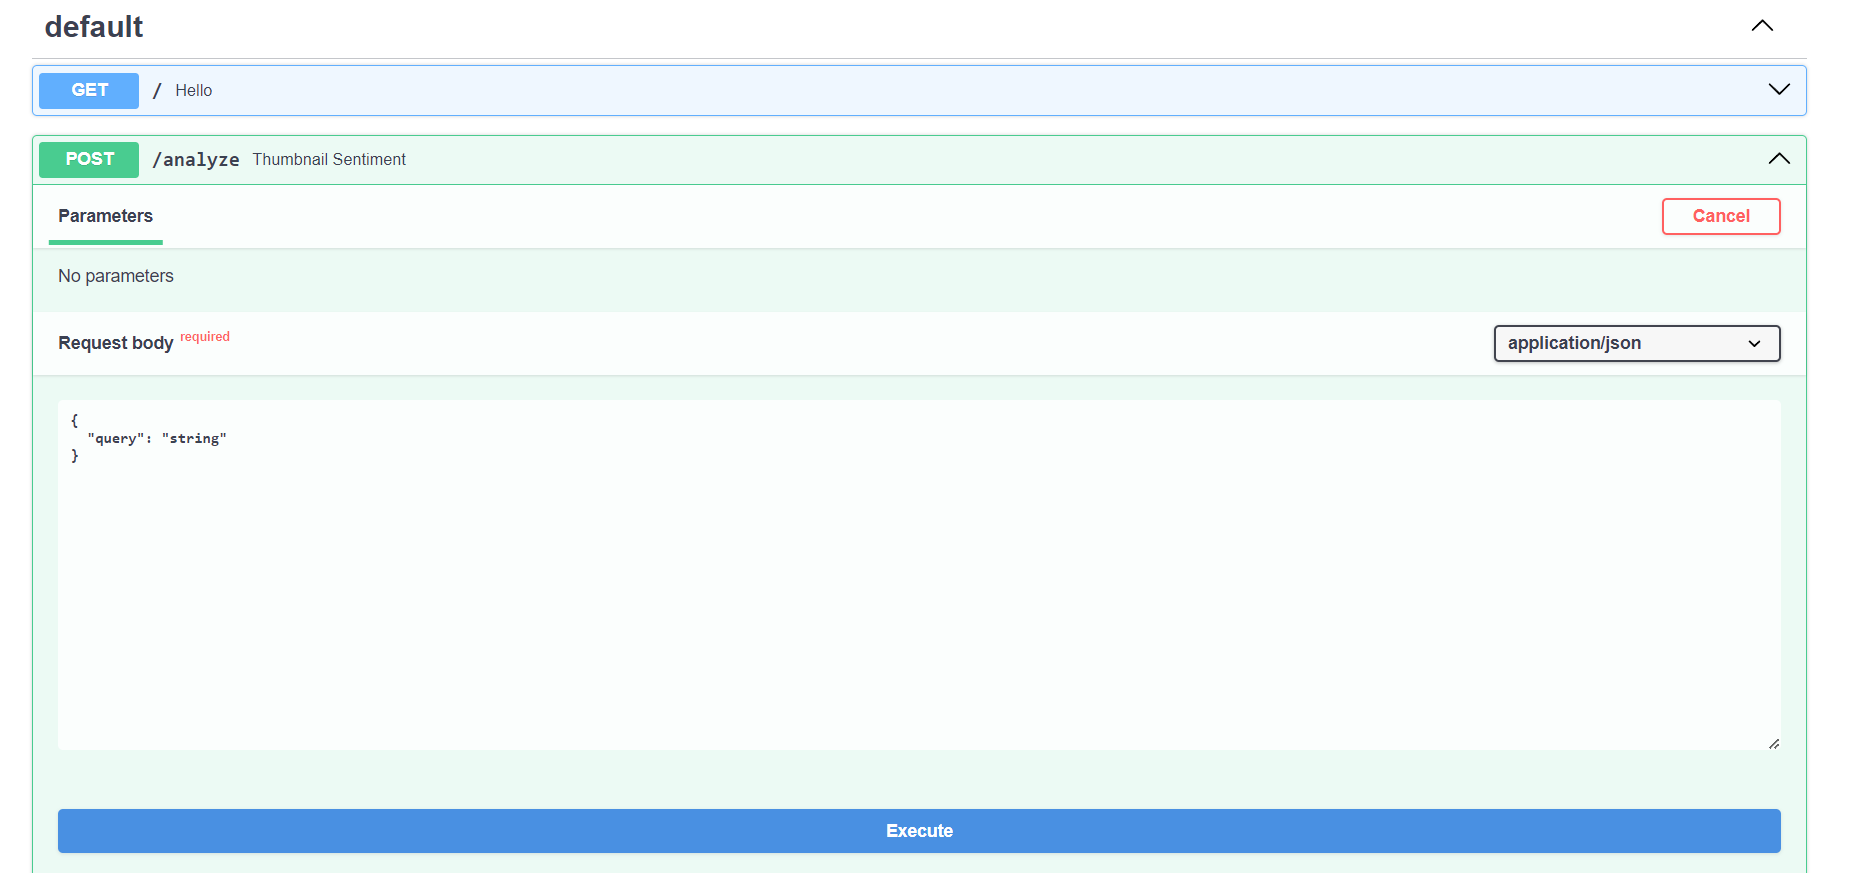



You can test the API via these docs. The 'Try it out' button comes in handy.

## StreamLit

We employ Streamlit to create an interactive web application that seamlessly integrates with previously developed APIs through the requests library. Leveraging the convenience of ngrok for secure tunneling, we expose our local Streamlit application to the web.

Using the ipython magic function `writefile`, we encapsulate the Streamlit code into a `main.py` file. Upon execution, the application prompts users to input a YouTube search query.

The "Analyze" button triggers a behind-the-scenes call to the local API at `http://localhost:8000/analyze` for sentiment analysis on YouTube thumbnails.

Understand and Learn about streamlit from here:

https://docs.streamlit.io/library/api-reference

https://docs.streamlit.io/library/cheatsheet

In [ ]:
%%writefile main.py

import streamlit as st
import requests
from typing import List

def main():
    st.title("YouTube Thumbnail Sentiment Analysis")

    # Input for the YouTube query
    query = st.text_input("Enter YouTube Video URL or Search Query:")

    if st.button("Analyze"):
        if not query:
            st.warning("Please enter a YouTube video URL or search query.")
        else:
            response = analyze_thumbnail_sentiment(query)
            # show the response with proper, good looking UI on your StreamLit
            st.subheader("Analysis Results")
            st.write(f"**Overall Sentiment:** {response.get('overall_sentiment')}")
            st.write(f"**Positive Score:** {response.get('positive_score')}")
            st.write(f"**Negative Score:** {response.get('negative_score')}")

def analyze_thumbnail_sentiment(query: str) -> dict:
    api_url = "http://localhost:8000/analyze"
    payload = {"query": query}
    response = requests.post(api_url, json=payload) # using requests lib, create a post request on the api URL
    response.raise_for_status()
    return response.json()

if __name__ == "__main__":
  main()

In [ ]:
ngrok_tunnel = ngrok.connect(80)
print('Public URL:', ngrok_tunnel.public_url)  # click on this in the output to see the Streamlit UI
nest_asyncio.apply()
!nohup streamlit run main.py --server.port 80 & # why this extra line here?
uvicorn.run(app, port=8000)

Good job, you built a project that scrapes YouTube Thumbnails and analyzes their sentiment and then deployed it successfully!

With that, your GDG Learning Period officially comes to an end. Thanks for sticking it out on this journey, and hope you learnt enough to ignite a lifelong passion for the field of Machine Learning.

Signing off for now, adios 👋